In [68]:
import pandas as pd
import numpy as np
import sklearn.linear_model as lm
from sklearn.feature_selection import r_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
phish = pd.read_csv("phish.csv")

In [70]:
phish

,Unnamed: 0,text,PHISH-GT,billing,account,generic,attachment,typos,click-link,grammar,login,urgency,phish,unsolicited,work
0,42,Please take a look at the attached and give me...,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,44,"Rod,\nI wanted to forward this to you. Arthur...",0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,45,\nI confirmed that since Enron does not deviat...,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,46,Good afternoon.\n\nI wanted to forward you one...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,47,Kim:\n\nHere is a summary of the structure we ...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2892,2936,PayPal You sent a payment of $699.99 USD to FT...,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2893,2937,"monkey.org¬† Hi jose,Pa‚Å†s‚Å†sword for‚Å†¬†jo...",1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
2894,2938,"HELLO, ¬† Please note that, your monthly payme...",1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2895,2939,Verify your¬†MetaMask Wallet Our system has sh...,1,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [71]:
true_phish = phish[phish['PHISH-GT']==1]
#this is our values that are all phishing emails.

In [72]:
fish = phish[phish['PHISH-GT']==0]
#this is our rows that are not phishing emails

Text(0.5, 1.0, 'Comparing Phish Probabilities of Billing-Related Emails')

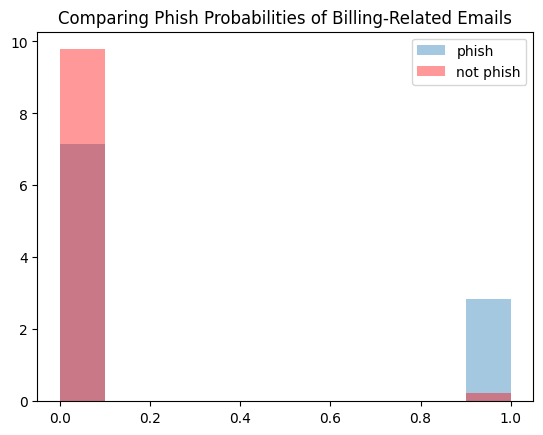

In [73]:
plt.hist(true_phish['billing'], label = 'phish', density = True, alpha = 0.4)
plt.hist(fish['billing'], label = 'not phish', density = True, alpha=0.4, color = 'red')
plt.legend()
plt.title("Comparing Phish Probabilities of Billing-Related Emails")

Text(0.5, 1.0, 'Comparing Phish Probabilities of Account-Related Emails')

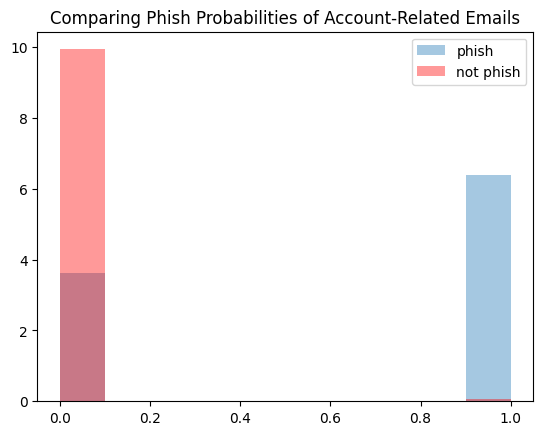

In [74]:
plt.hist(true_phish['account'], histtype='stepfilled', label = 'phish', density = True, stacked = True, alpha = 0.4)
plt.hist(fish['account'], label = 'not phish', density = True, stacked = True, alpha=0.4, color = 'red')
plt.legend()
plt.title("Comparing Phish Probabilities of Account-Related Emails")

Text(0.5, 1.0, 'Comparing Phish Probabilities of Generic-Related Emails')

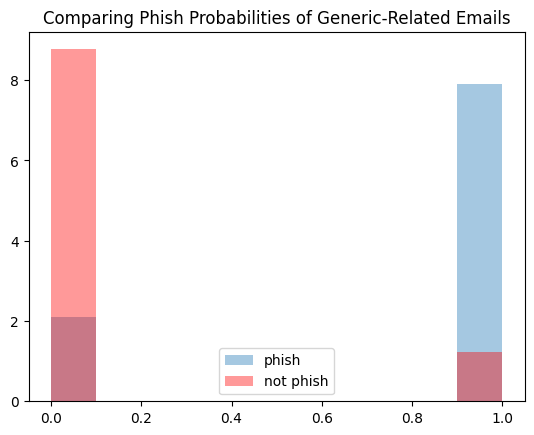

In [75]:
plt.hist(true_phish['generic'], histtype='stepfilled', label = 'phish', density = True, stacked = True, alpha = 0.4)
plt.hist(fish['generic'], label = 'not phish', density = True, stacked = True, alpha=0.4, color = 'red')
plt.legend()
plt.title("Comparing Phish Probabilities of Generic-Related Emails")

Text(0.5, 1.0, 'Comparing Phish Probabilities of Emails Containing Attachments')

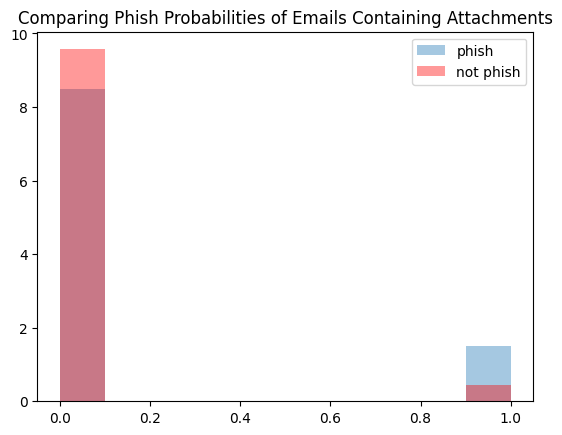

In [76]:
plt.hist(true_phish['attachment'], histtype='stepfilled', label = 'phish', density = True, stacked = True, alpha = 0.4)
plt.hist(fish['attachment'], label = 'not phish', density = True, stacked = True, alpha=0.4, color = 'red')
plt.legend()
plt.title("Comparing Phish Probabilities of Emails Containing Attachments")

Text(0.5, 1.0, 'Comparing Phish Probabilities of Emails Containing Typos')

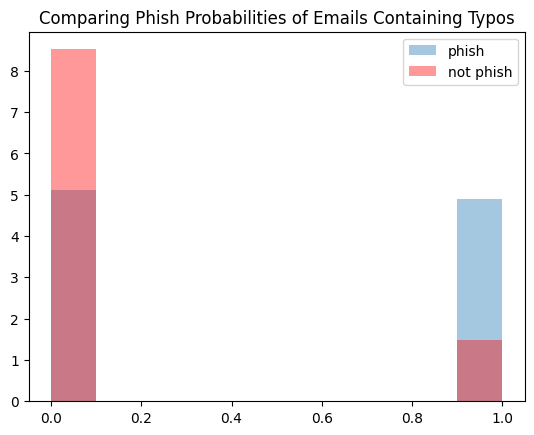

In [77]:
plt.hist(true_phish['typos'], histtype='stepfilled', label = 'phish', density = True, stacked = True, alpha = 0.4)
plt.hist(fish['typos'], label = 'not phish', density = True, stacked = True, alpha=0.4, color = 'red')
plt.legend()
plt.title("Comparing Phish Probabilities of Emails Containing Typos")

Text(0.5, 1.0, 'Comparing Phish Probabilities of Emails Containing Links')

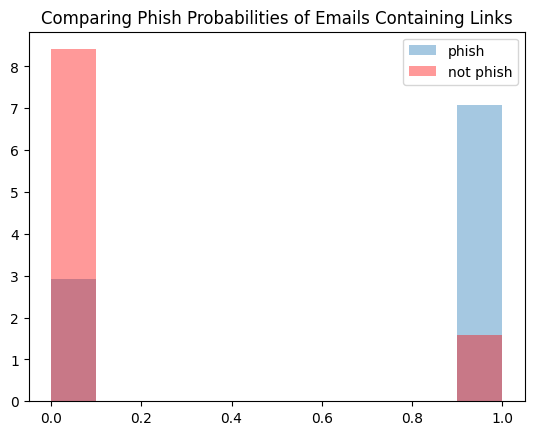

In [78]:
plt.hist(true_phish['click-link'], histtype='stepfilled', label = 'phish', density = True, stacked = True, alpha = 0.4)
plt.hist(fish['click-link'], label = 'not phish', density = True, stacked = True, alpha=0.4, color = 'red')
plt.legend()
plt.title("Comparing Phish Probabilities of Emails Containing Links")

Text(0.5, 1.0, 'Comparing Phish Probabilities of Grammatically Correct Emails')

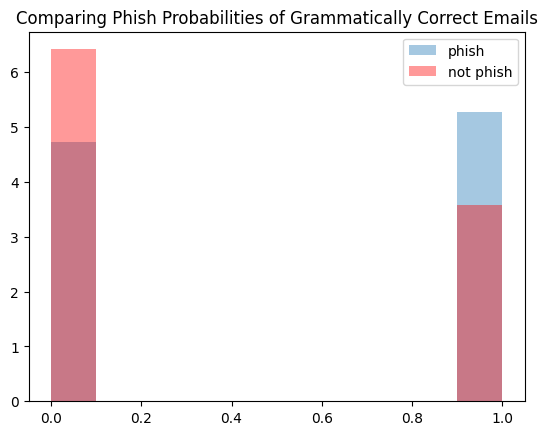

In [79]:
plt.hist(true_phish['grammar'], histtype='stepfilled', label = 'phish', density = True, stacked = True, alpha = 0.4)
plt.hist(fish['grammar'], label = 'not phish', density = True, stacked = True, alpha=0.4, color = 'red')
plt.legend()
plt.title("Comparing Phish Probabilities of Grammatically Correct Emails")

Text(0.5, 1.0, 'Comparing Phish Probabilities of Emails About Logins')

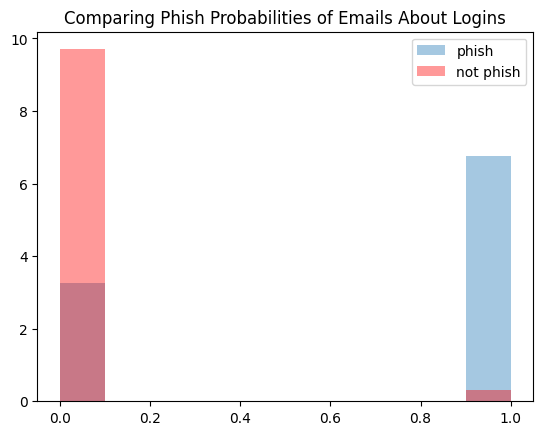

In [80]:
plt.hist(true_phish['login'], histtype='stepfilled', label = 'phish', density = True, stacked = True, alpha = 0.4)
plt.hist(fish['login'], label = 'not phish', density = True, stacked = True, alpha=0.4, color = 'red')
plt.legend()
plt.title("Comparing Phish Probabilities of Emails About Logins")

Text(0.5, 1.0, 'Comparing Phish Probabilities of Urgent Emails')

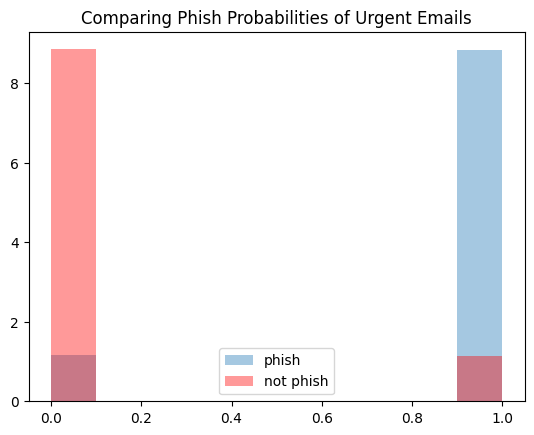

In [81]:
plt.hist(true_phish['urgency'], histtype='stepfilled', label = 'phish', density = True, stacked = True, alpha = 0.4)
plt.hist(fish['urgency'], label = 'not phish', density = True, stacked = True, alpha=0.4, color = 'red')
plt.legend()
plt.title("Comparing Phish Probabilities of Urgent Emails")

Text(0.5, 1.0, 'Comparing Phish Probabilities of Soliciting Emails')

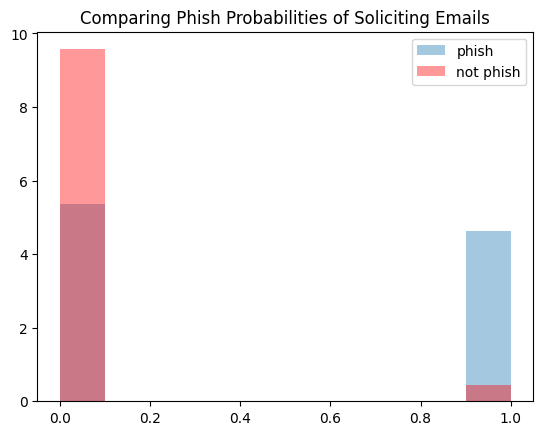

In [82]:
plt.hist(true_phish['unsolicited'], histtype='stepfilled', label = 'phish', density = True, stacked = True, alpha = 0.4)
plt.hist(fish['unsolicited'], label = 'not phish', density = True, stacked = True, alpha=0.4, color = 'red')
plt.legend()
plt.title("Comparing Phish Probabilities of Soliciting Emails")

Text(0.5, 1.0, 'Comparing Phish Probabilities of Work-Related Emails')

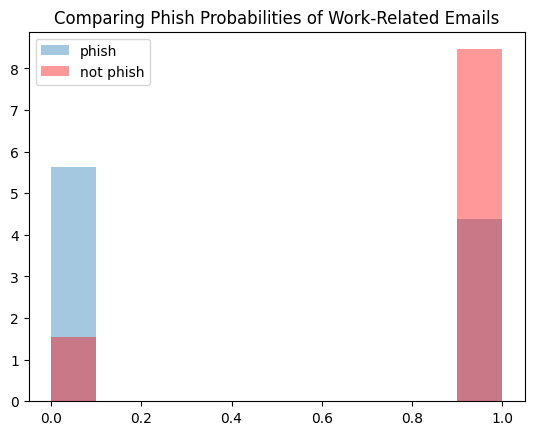

In [83]:
plt.hist(true_phish['work'], histtype='stepfilled', label = 'phish', density = True, stacked = True, alpha = 0.4)
plt.hist(fish['work'], label = 'not phish', density = True, stacked = True, alpha=0.4, color = 'red')
plt.legend()
plt.title("Comparing Phish Probabilities of Work-Related Emails")

In [84]:
# Let's try using Logistic Regression. Let's separate our data first.

In [85]:
X = phish[['billing', 'account', 'generic', 'attachment', 'typos', 'click-link', 'grammar', 'login', 'urgency', 'unsolicited', 'work']]
Y = phish['PHISH-GT']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [86]:
model = lm.LogisticRegression()
model.fit(X_train, Y_train)


LogisticRegression()

In [87]:
training_accuracy = model.score(X_train, Y_train)
training_accuracy

0.937419076391886

In [88]:
# A 93% accuracy is fantastic! Let's see how accurate it is, for our test data.

In [89]:
test_accuracy = model.score(X_test, Y_test)
test_accuracy

0.9413793103448276

In [90]:
#this looks pretty swaggy

In [91]:
# compute correlations between hand and automated labels (phish v phish-GT)
# sklearn has Pearson or Spearmin
# stare at coefficients to see which ones have the highest weight
# do error analysis; try to figure out why its erroring. False positives v false negatives... Precision and recall, F1, decision matrix.
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction.text and tfidfvectorizer are important!
# https://fasttext.cc takes semantically close words into consideration

Text(0, 0.5, 'Predicted Phish Label')

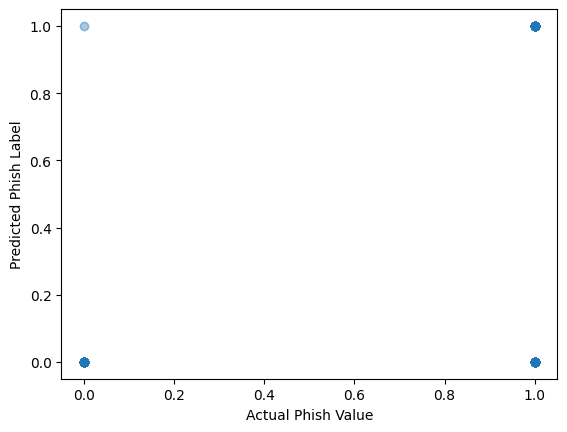

In [92]:
plt.scatter(phish["PHISH-GT"], phish["phish"], alpha = 0.05)
plt.xlabel("Actual Phish Value")
plt.ylabel("Predicted Phish Label")

In [93]:
# It seems like we sometimes falsely predict non-phish emails as phishing emails, with our initial dataset. That's ok though!

In [94]:
phish[["phish", "PHISH-GT"]].corr(method='pearson')
# There is a Pearson correlation of 0.699, meaning a 69.9% correlation between the predicted and actual phishing emails.

,phish,PHISH-GT
phish,1.000000,0.699824
PHISH-GT,0.699824,1.000000


In [95]:
phish[['phish', 'PHISH-GT']].corr(method='spearman')

,phish,PHISH-GT
phish,1.000000,0.699824
PHISH-GT,0.699824,1.000000


In [96]:
# Same for Spearman!

In [97]:
coef_vals = model.coef_

In [98]:
coef_names = ['billing', 'account', 'generic', 'attachment', 'typos', 'click-link', 'grammar', 'login', 'urgency', 'unsolicited', 'work']

In [99]:
coef_values = coef_vals[0]
len(coef_values)
for j in np.arange(len(coef_values)):
    name = coef_names[j]
    womp = coef_values[j]
    print(name, ":", womp)
#tbh i'm just doing this to make it easier on the eyes

billing : 2.262767602642952
account : 2.433583467489403
generic : 1.7321524297650723
attachment : 1.8322485364934706
typos : 0.981092992903858
click-link : -0.11747065825572954
grammar : -0.5150719886242616
login : 2.2509251327099817
urgency : 2.092610602209187
unsolicited : 1.102677029485312
work : -1.825247233579223


In [100]:
# from last time's research, we discovered that the further away from zero a coefficient value was, the more impact the coefficient had on categorizing something. 

In [101]:
# click-link seems to have the least impact, since it is the closest to zero. Let's make a model without it?

In [102]:
new_model = lm.LogisticRegression()
new_x = phish[['billing', 'account', 'generic', 'attachment', 'typos', 'grammar', 'login', 'urgency', 'unsolicited', 'work']]
X_train, X_test, Y_train, Y_test = train_test_split(new_x, Y, test_size = 0.2, random_state=42)
new_model.fit(X_train, Y_train)
new_training_accuracy = new_model.score(X_train, Y_train)
new_model_accuracy = new_model.score(X_test, Y_test)
print("Original Training Accuracy:", training_accuracy)
print("New Training accuracy:", new_training_accuracy)
print("Old Model Accuracy:", test_accuracy)
print("New Model Accuracy:", new_model_accuracy)

Original Training Accuracy: 0.937419076391886
New Training accuracy: 0.9382822615451014
Old Model Accuracy: 0.9413793103448276
New Model Accuracy: 0.9413793103448276


In [103]:
# hurrah! by eliminating a single variable from our dataset when determining what factors to use for our model, our logistic regression model has become significantly more efficient! 

In [104]:
skibidi = new_model.predict(X_test)

<Axes: >

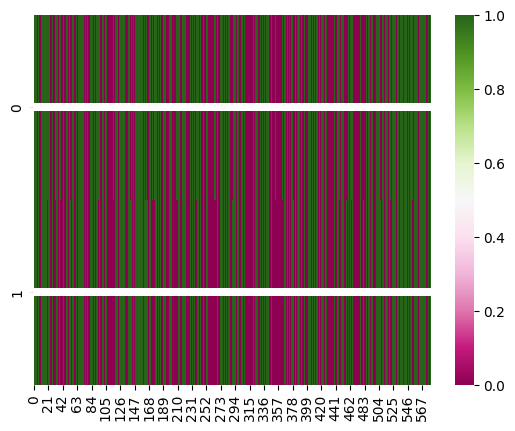

In [105]:
sns.heatmap(np.array([Y_test, skibidi]), annot=True, fmt=".2f", annot_kws = {'size':7}, cmap = 'PiYG')

In [106]:
# that looks somewhat... unhelpful... let's try a confusion matrix?

In [107]:
cm = confusion_matrix(Y_test, skibidi)
cm

array([[263,  10],
       [ 24, 283]])

<Axes: >

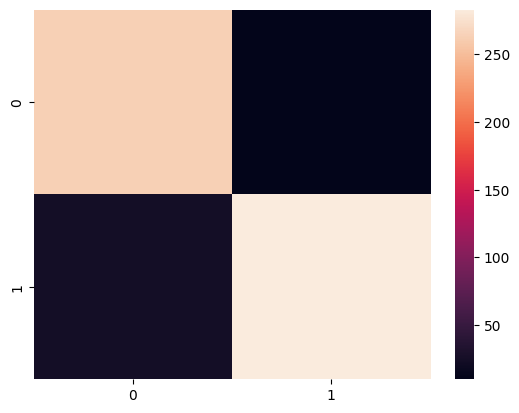

In [108]:
sns.heatmap(cm)

In [109]:
# let's try interpreting said confusion matrix?

In [110]:
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
ACC = (TP+TN)/(TP+FP+FN+TN)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Recall:", TPR*100, "%")
print("Precision:", PPV*100, "%")

Recall: 91.63763066202091 %
Precision: 96.33699633699634 %


In [111]:
rizz = new_model.predict_proba(X_test)


In [46]:
# check out sklearn's metrics to look at the scoring
# precision matters most
# try to explore decision trees
# predict_proba; check it out! predict prob to increase precision
#precision recall curve (graph precision on x and recall on y)

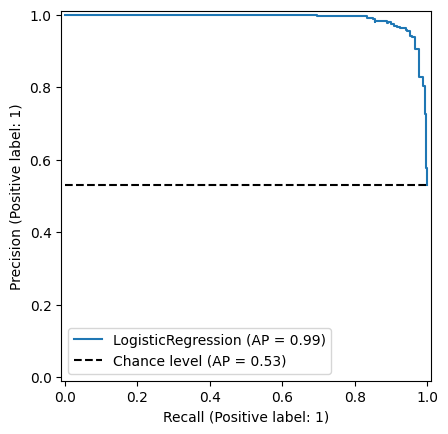

In [117]:
display = PrecisionRecallDisplay.from_estimator(new_model, X_test, Y_test, plot_chance_level = True)